<a href="https://colab.research.google.com/github/mdelleani/neuro-next-bootcamp/blob/main/notebooks/02_advanced_ai_neurology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 ~~Applicazione pratica di un modello per la generazione di dati sintetici applicato alla Neurologia~~ Applicazioni Avanzate dell'IA in Neurologia: Dalla Segmentazione Immagini ai LLM 🧠

**Sessione Interattiva | Parte II: Applicazioni Pratiche**

* **Docente:** M. Delleani
* **Orario:** 18:00 - 19:15

---

Benvenuti alla seconda parte della nostra sessione interattiva!

Mentre il titolo originale della sessione era focalizzato sulla generazione di dati sintetici, per questa demo pratica abbiamo scelto di esplorare due aree di frontiera dell'Intelligenza Artificiale con un impatto immediato e tangibile in Neurologia, più facilmente dimostrabili in un contesto di sessione interattiva:

1.  **Segmentazione di Immagini Mediche:** Come l'IA può aiutare a identificare e delineare automaticamente strutture o patologie (es. lesioni, tumori, regioni cerebrali) nelle immagini diagnostiche (RM, TC).
2.  **Large Language Models (LLM) per l'Analisi Testuale:** Come i modelli di linguaggio possono elaborare e interpretare testo medico (es. cartelle cliniche, articoli scientifici) per estrarre informazioni chiave, riassumere o rispondere a domande.

Queste applicazioni mostrano la versatilità e il potenziale dell'IA nel supportare la diagnosi, la ricerca e la gestione clinica in neurologia.

---


## 1. Segmentazione di Immagini in Neurologia: Identificare e Delineare

La **segmentazione di immagini** è una tecnica di visione artificiale che consiste nel suddividere un'immagine in regioni o oggetti con proprietà simili. In medicina, è fondamentale per:

* **Quantificazione:** Misurare il volume di lesioni, tumori o atrofia cerebrale.
* **Navigazione Chirurgica:** Delineare le aree di interesse per interventi precisi.
* **Diagnosi:** Aiutare a identificare e localizzare patologie.


### 1.1. MedSAM: Un Modello Fondamentale per la Segmentazione Medica

**MedSAM (Medical Segment Anything Model)** è un esempio di "foundation model" adattato al dominio medico. Nasce dal successo del modello Segment Anything Model (SAM) di Meta AI, addestrato su una quantità enorme di immagini generiche. MedSAM è stato poi specializzato per riconoscere e segmentare una vasta gamma di strutture anatomiche e patologie nelle immagini mediche con notevole accuratezza, anche con pochi esempi o con input minimi (es. un singolo punto).

**Nota importante per la demo:** L'esecuzione di MedSAM su immagini complesse può richiedere risorse computazionali significative (GPU dedicate e RAM). Per questa sessione, dimostreremo il concetto: potremmo mostrare l'output pre-calcolato su un'immagine di esempio, oppure, se le risorse di Colab lo permettono in tempo reale per un esempio semplificato, eseguiremo una versione più leggera o un modello simile.

#### **Esempio Concettuale di Segmentazione**

Simuleremo il caricamento di un'immagine di risonanza magnetica cerebrale e visualizzeremo un esempio di segmentazione di una lesione.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# --- Parte 1: Download e Visualizzazione di un'Immagine Medica di Esempio ---
# Useremo un'immagine di esempio disponibile pubblicamente o genereremo una dummy.
# Per una demo reale, potresti avere un'immagine di RM cerebrale con una lesione.

# Funzione per scaricare un'immagine
def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status() # Lancia un errore per risposte http errate
        img = Image.open(BytesIO(response.content)).convert("L") # Converti in scala di grigi
        return np.array(img)
    except Exception as e:
        print(f"Errore durante il download o l'apertura dell'immagine: {e}")
        # Genera un'immagine dummy se il download fallisce
        print("Generazione di un'immagine di esempio sintetica...")
        dummy_img = np.zeros((128, 128), dtype=np.uint8)
        # Aggiungi una forma semplice per simulare una struttura
        dummy_img[30:60, 30:60] = 150 # Regione grigia
        dummy_img[70:90, 70:90] = 200 # Regione più chiara
        return dummy_img


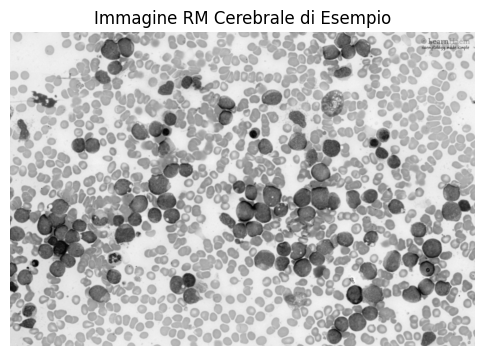

In [6]:

# URL di un'immagine di esempio (puoi sostituirla con una tua immagine medicale)
# Questa è un'immagine generica di un cervello.
image_url = 'https://www.learnhaem.com/wp-content/uploads/2020/02/aml-m1-1024x691.png' # @param
# Puoi anche caricare un'immagine direttamente su Colab e usarla:
# from google.colab import files
# uploaded = files.upload()
# img_path = list(uploaded.keys())[0]
# original_image = np.array(Image.open(img_path).convert("L"))

original_image = download_image(image_url)

if original_image is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image, cmap='gray')
    plt.title('Immagine RM Cerebrale di Esempio')
    plt.axis('off')
    plt.show()


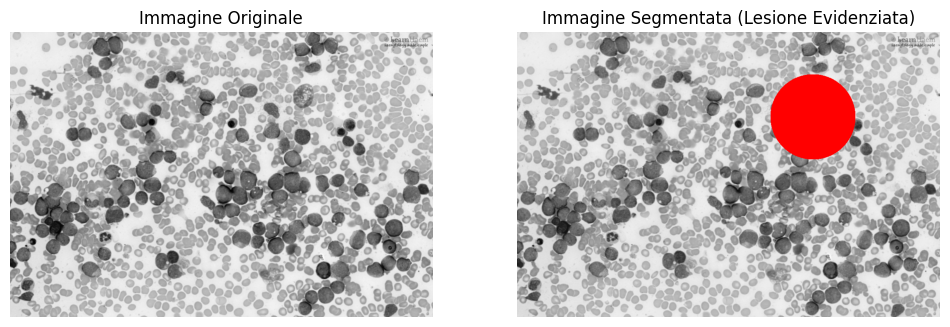


Spiegazione della Segmentazione:
In questo esempio concettuale, abbiamo simulato come un modello di IA (come MedSAM)
potrebbe identificare e delineare una specifica area di interesse, come una lesione o
una struttura anatomica. L'area rossa indica la regione 'segmentata' dal modello.
Questo è fondamentale per la quantificazione e la pianificazione diagnostica/terapeutica.


In [10]:
# --- Parte 2: Simulazione Concettuale della Segmentazione ---
# Per una demo live con MedSAM, dovresti installare le librerie MedSAM e caricarne un checkpoint.
# Dato il tempo limitato e le risorse, mostreremo il CONCETTO di mascheramento.

# Creiamo una maschera di segmentazione FITTIZIA per l'esempio
# Questa maschera simula la segmentazione di una lesione o di una struttura specifica.
segmentation_mask = np.zeros_like(original_image, dtype=np.uint8)
# Simula una lesione nella parte superiore destra dell'immagine
mask_center_x, mask_center_y = int(original_image.shape[1] * 0.7), int(original_image.shape[0] * 0.3)
mask_radius = int(min(original_image.shape) * 0.15)
Y, X = np.ogrid[:original_image.shape[0], :original_image.shape[1]]
dist_from_center = np.sqrt((X - mask_center_x)**2 + (Y - mask_center_y)**2)
segmentation_mask[dist_from_center < mask_radius] = 1 # Imposta a 1 dove c'è la "lesione"

# Combina l'immagine originale con la maschera di segmentazione
# Sovrapponiamo la maschera sulla scala di blu per visualizzare l'area segmentata
segmented_overlay = np.stack([original_image, original_image, original_image], axis=-1)
segmented_overlay[segmentation_mask == 1, 0] = 255 # Rende rossa la zona segmentata
segmented_overlay[segmentation_mask == 1, 1] = 0
segmented_overlay[segmentation_mask == 1, 2] = 0

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_overlay)
plt.title('Immagine Segmentata (Lesione Evidenziata)')
plt.axis('off')

plt.show()

print("\nSpiegazione della Segmentazione:")
print("In questo esempio concettuale, abbiamo simulato come un modello di IA (come MedSAM)")
print("potrebbe identificare e delineare una specifica area di interesse, come una lesione o")
print("una struttura anatomica. L'area rossa indica la regione 'segmentata' dal modello.")
print("Questo è fondamentale per la quantificazione e la pianificazione diagnostica/terapeutica.")



### 2. Large Language Models (LLM) per l'Analisi Testuale in Neurologia
I Large Language Models (LLM) sono modelli di IA addestrati su enormi quantità di testo per comprendere, generare e manipolare il linguaggio umano. Hanno rivoluzionato il modo in cui interagiamo con l'informazione e stanno mostrando un potenziale immenso anche nel settore medico.



#### 2.1. Applicazioni degli LLM in Medicina e Neurologia

- Riassunto di Cartelle Cliniche/Articoli: Estrarre i punti chiave da lunghi testi.

- Estrazione di Informazioni: Identificare sintomi, diagnosi, farmaci, dosaggi da testi non strutturati.

- Supporto Decisionale Clinico: Fornire informazioni basate sull'evidenza da banche dati mediche (con cautela).

- Generazione di Rapporti: Aiutare a redigere referti o documentazione.
Analisi di Testi Scientifici: Accelerare la revisione della letteratura.



#### 2.2. Interagire con LLM Generali e Specializzati (tramite vLLM)

Avremo la possibilità di interagire con un'istanza di vLLM (un server di inferenza ad alte prestazioni per LLM) che ci permetterà di testare rapidamente modelli di linguaggio.

Useremo un approccio basato su API (Application Programming Interface), simulando una chiamata a un servizio esterno che ospita il modello.

**Esempio testo in Neurologia**

In [11]:
testo_clinico_neurologia = """
Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.
"""

testo_articolo_neurologia = """
Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,
con alcuni pazienti che riportano eventi avversi come ARIA-E. La ricerca è stata pubblicata
su "Nature Neuroscience".
"""

print("Testo Clinico di Esempio:")
print(testo_clinico_neurologia)
print("\nTesto Articolo Scientifico di Esempio:")
print(testo_articolo_neurologia)

Testo Clinico di Esempio:

Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


Testo Articolo Scientifico di Esempio:

Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,

**Funzione per Chiamare un LLM (via API)**

Simuleremo una chiamata API al tuo server vLLM. Dovrai sostituire YOUR_VLLM_ENDPOINT e YOUR_MODEL_NAME con i dettagli reali del tuo setup vLLM.

In [ ]:
import requests
import json
import httpx

# --- CONFIGURAZIONE DEL TUO VLLM (DA MODIFICARE!) ---
VLLM_ENDPOINT = f"http://{HOST}:{PORT}/v1/chat/completions" # Esempio: http://tuo_server_ip:8000/generate
GENERALIST_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct" # Esempio: "mistralai/Mistral-7B-Instruct-v0.2"
MEDGEMMA_MODEL_NAME = "unsloth/medgemma-4b-it-bnb-4bit" # Esempio: "google/medgemma-7b"

# Funzione per inviare una richiesta al tuo server vLLM
async def call_llm(prompt, model_name, max_tokens=150, temperature=0.7):
    headers = {"Content-Type": "application/json"}
    payload = {
        "messages": [{"role": "user", "content": prompt}],
        "model": model_name,
        "max_tokens": max_tokens,
        "temperature": temperature
    }

    try:
        async with httpx.AsyncClient(timeout=50) as client:
          response = await client.post(VLLM_ENDPOINT, json=payload)
          response.raise_for_status()
          result = response.json()
          response_text = result["choices"][0]["message"]["content"]
          # vLLM restituisce un array di "text" nei "outputs"
          return response_text # result['outputs'][0]['text'].strip()
    except requests.exceptions.ConnectionError:
        return "Errore di connessione al server vLLM. Assicurati che l'endpoint sia corretto e il server sia attivo."
    except requests.exceptions.HTTPError as e:
        return f"Errore HTTP dal server vLLM: {e}. Controlla il modello e i parametri."
    except Exception as e:
        return f"Si è verificato un errore inatteso: {e}"

print("Pronto a interagire con gli LLM tramite vLLM.")
print("Ricorda di configurare YOUR_VLLM_ENDPOINT, GENERALIST_MODEL_NAME e MEDGEMMA_MODEL_NAME!")